# load the dataset && Check for missing values in each column

In [1]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Vedha Pranava\Desktop\fds_pro\PCSPF-Pancreatic Cancer Survival based on Preoperative Features.xlsx"
df = pd.read_excel(file_path)

# View basic information about the dataset
print("Dataset Info:")
print(df.info())

# Check for missing values in each column
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Preview the first and last few rows of the dataset
print("\nFirst 5 Rows:")
print(df.head())

print("\nLast 5 Rows:")
print(df.tail())

# Analyze the target variable
target_column = 'label(Survive more than or equal to one year(1) / Survive less than one year(0))'
print("\nTarget Variable Distribution:")
print(df[target_column].value_counts())

# Check the column names for consistency
print("\nColumn Names:")
print(df.columns)

# Summary statistics for numeric columns
print("\nStatistical Summary of Numeric Features:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 21 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Sex                                                                               878 non-null    int64  
 1   Abdominal Pain                                                                    878 non-null    int64  
 2   Age                                                                               878 non-null    float64
 3   BMI                                                                               878 non-null    float64
 4   CRP                                                                               878 non-null    float64
 5   ALB                                                                               878 non-null    f

# Handle Missing Values

In [2]:
# Handle Missing Values
print("\nHandling Missing Values...")
missing_values = df.isnull().sum()
print(f"Columns with missing values:\n{missing_values[missing_values > 0]}")

# Drop rows or fill missing values (e.g., mean/median for numerical, mode for categorical)
df = df.fillna(df.mean())  # Replace numeric missing values with column mean
# You can replace with other methods as needed:
# df['ColumnName'] = df['ColumnName'].fillna('Value')  # For categorical values

# Check for Duplicates
print("\nChecking for Duplicates...")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df = df.drop_duplicates()

# Ensure Consistent Data Types
print("\nEnsuring Data Types Consistency...")
print(df.dtypes)  # Check data types
# Convert columns if needed, e.g.:
# df['CategoricalColumn'] = df['CategoricalColumn'].astype('category')

# Rename Columns for Clarity
print("\nRenaming Columns for Better Readability...")
df.rename(columns={
    'label(Survive more than or equal to one year(1) / Survive less than one year(0))': 'Survival_Label'
}, inplace=True)
print("Updated Columns:", df.columns)

# Drop Irrelevant Features
print("\nDropping Irrelevant Features...")
# If there are irrelevant columns like IDs or metadata, drop them
# df = df.drop(['IrrelevantColumn'], axis=1)

# Standardize Numeric Features (optional, depending on model choice)
from sklearn.preprocessing import StandardScaler

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop('Survival_Label')
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("\nData Cleaning Complete.")



Handling Missing Values...
Columns with missing values:
Series([], dtype: int64)

Checking for Duplicates...
Number of duplicate rows: 0

Ensuring Data Types Consistency...
Sex                                                                                   int64
Abdominal Pain                                                                        int64
Age                                                                                 float64
BMI                                                                                 float64
CRP                                                                                 float64
ALB                                                                                 float64
CRP/ALB                                                                             float64
Leukocyte                                                                           float64
Neutrocyte                                                                          float6

# exploratory data analysis


Visualizing Feature Distributions...


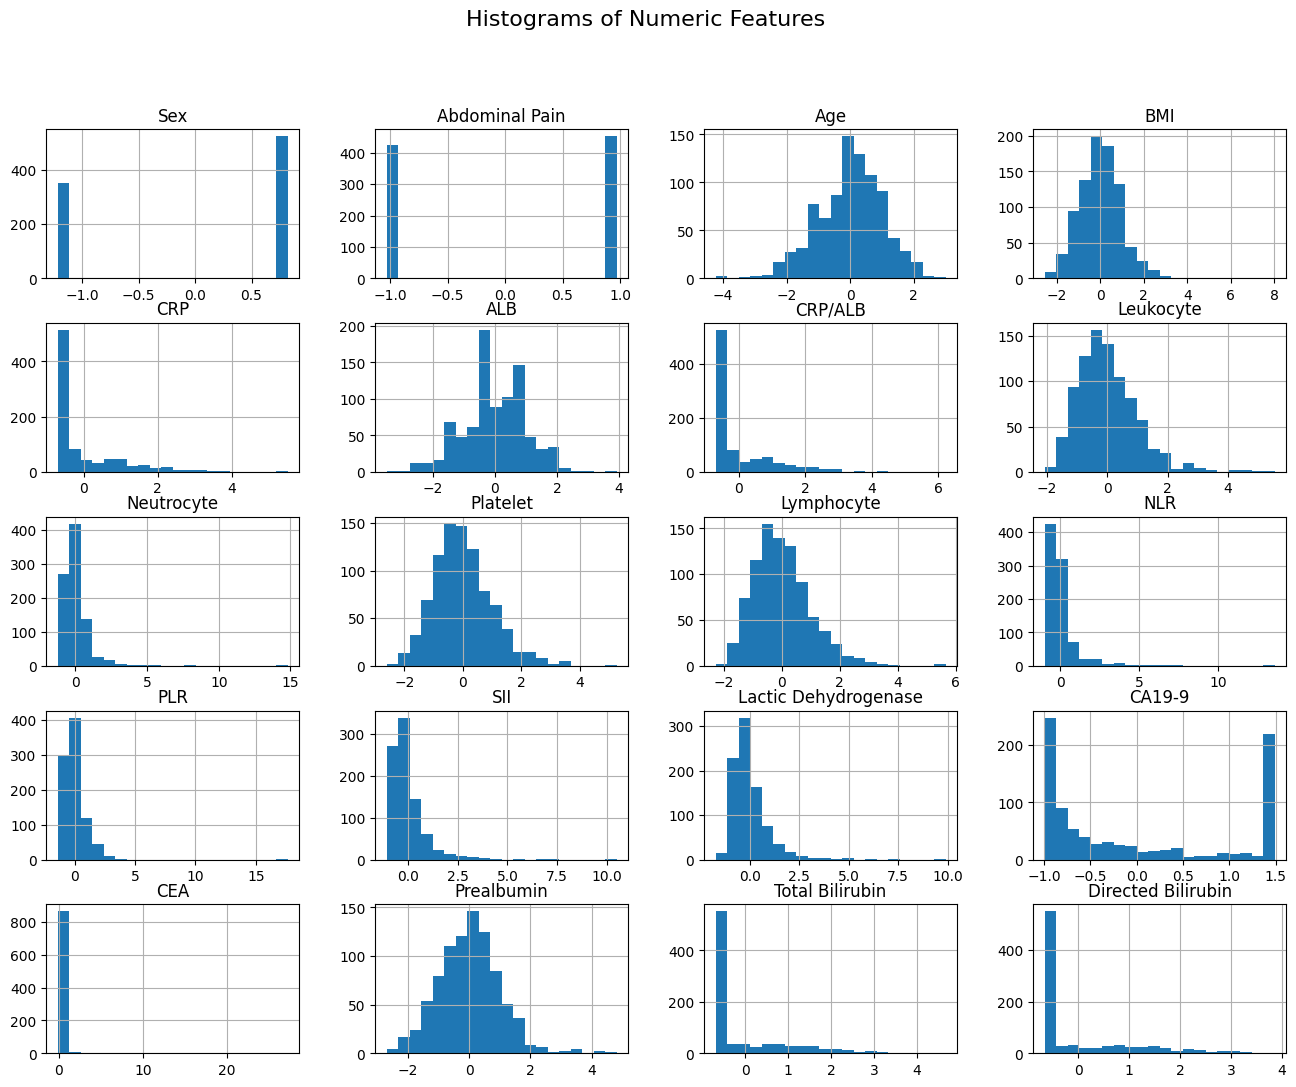


Analyzing Relationships with the Target Variable...


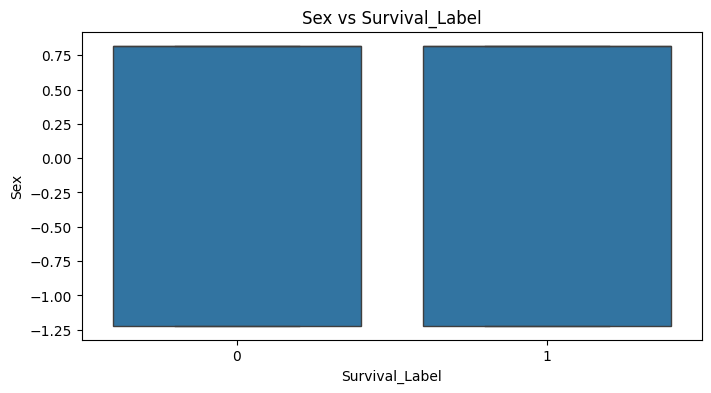

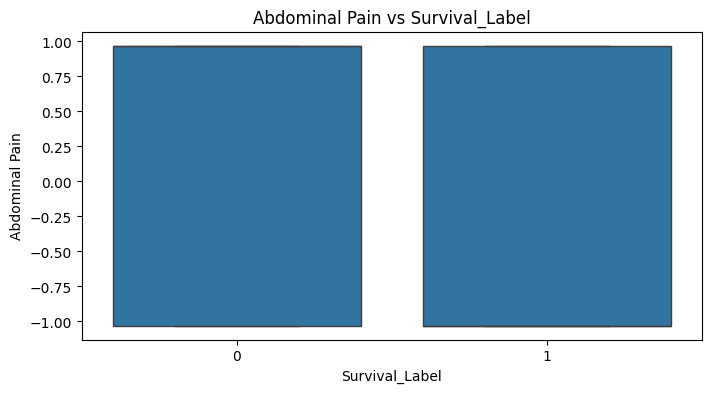

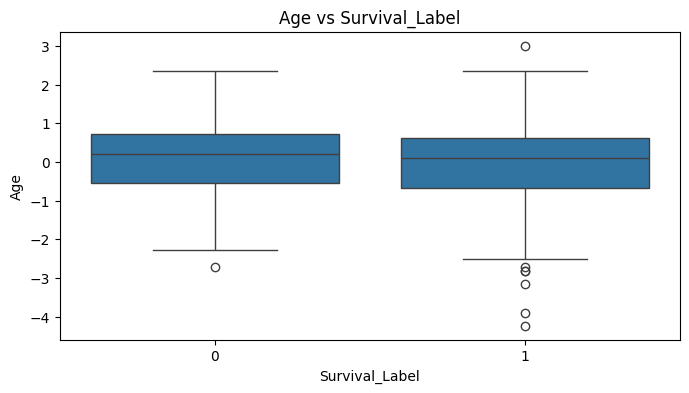

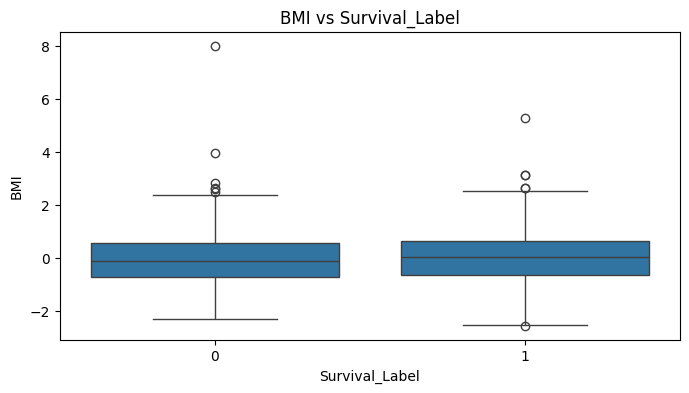

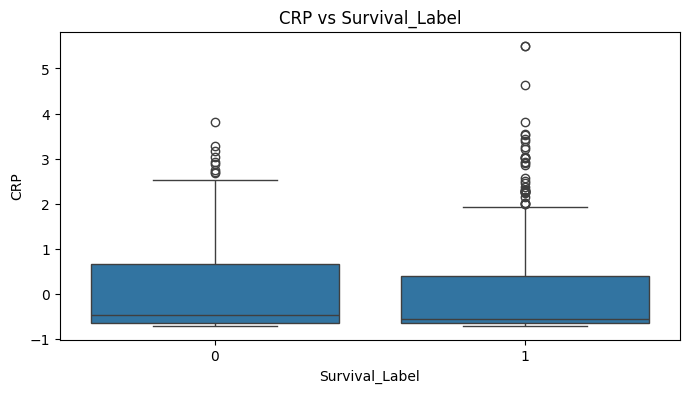

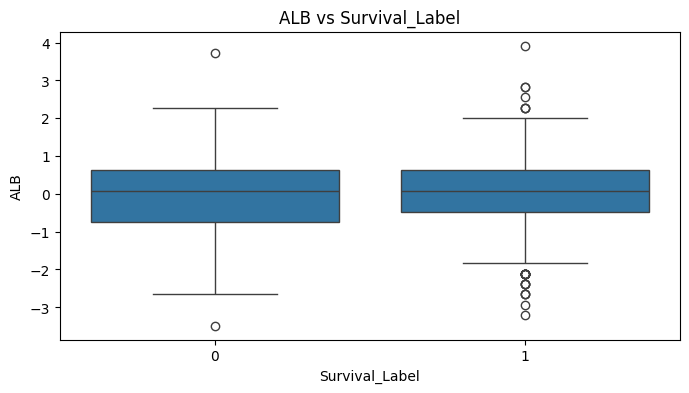

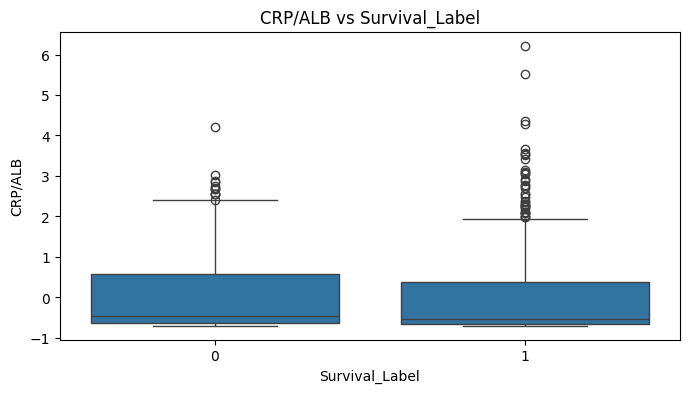

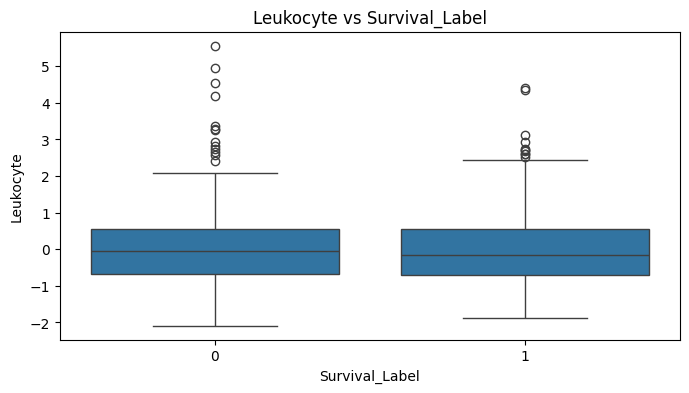

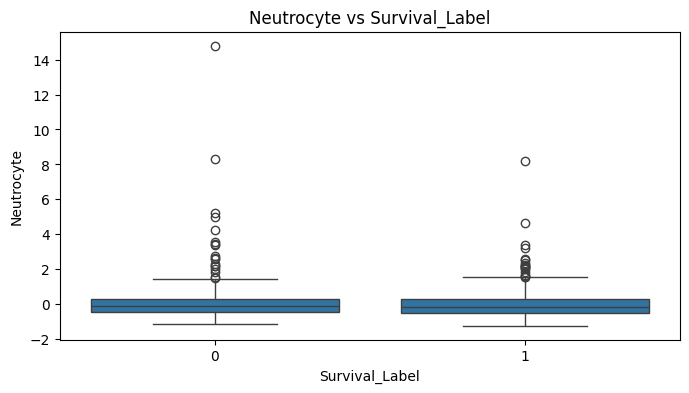

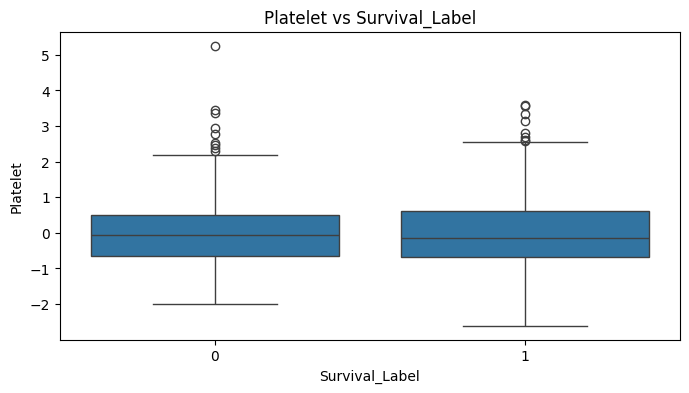

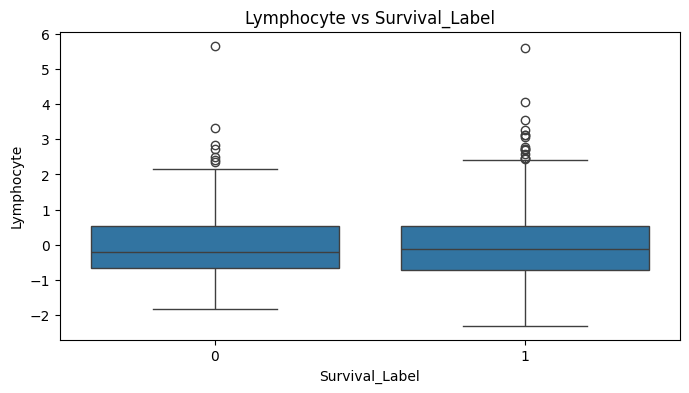

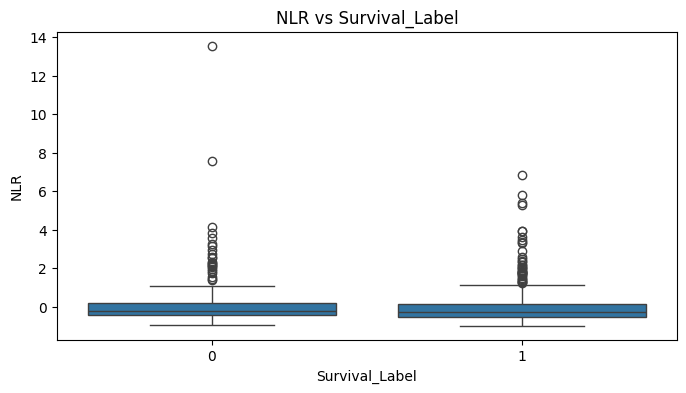

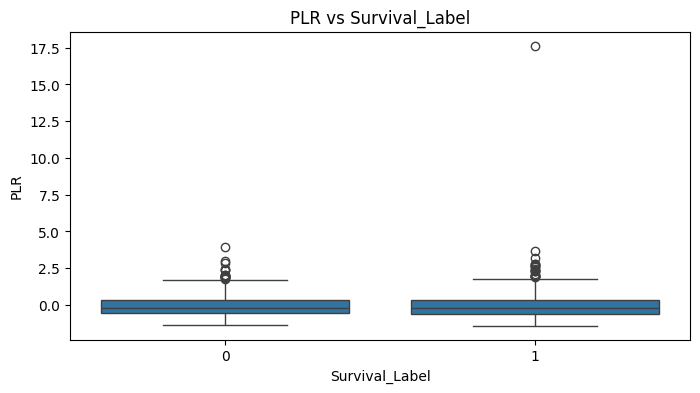

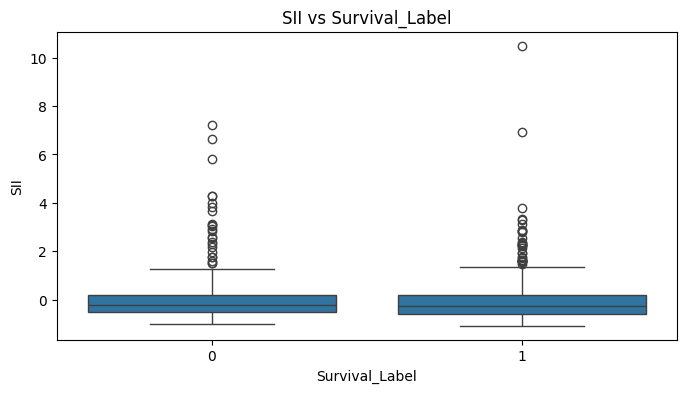

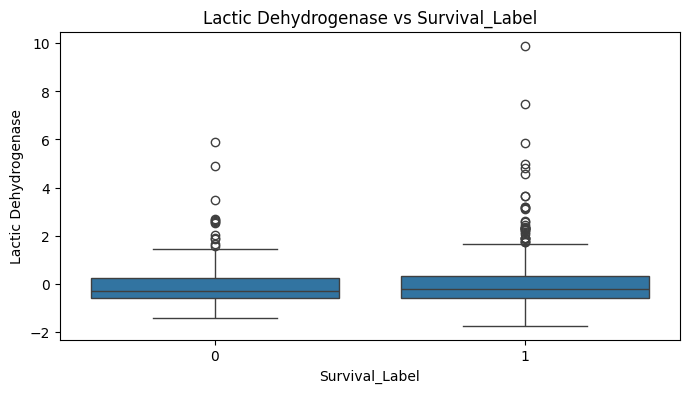

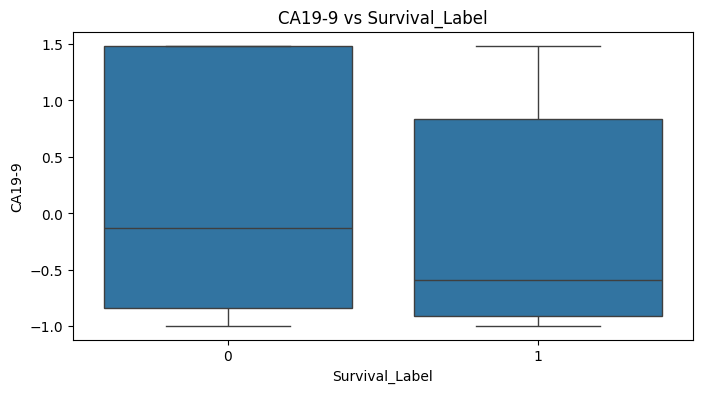

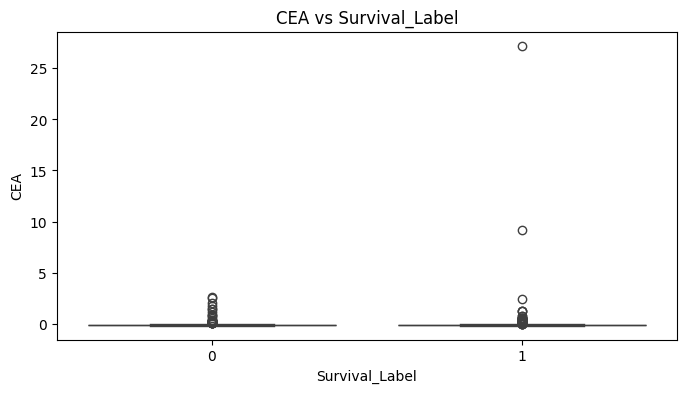

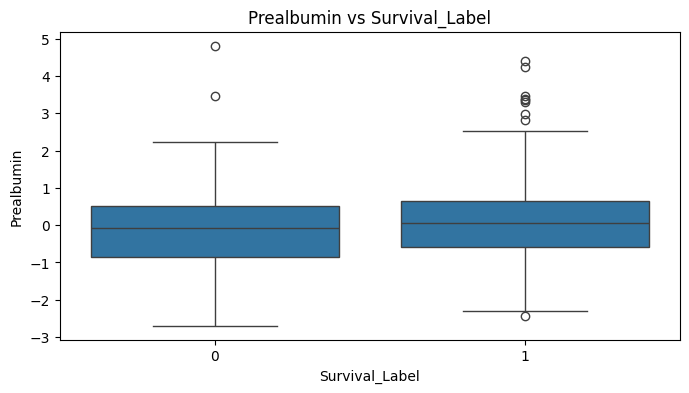

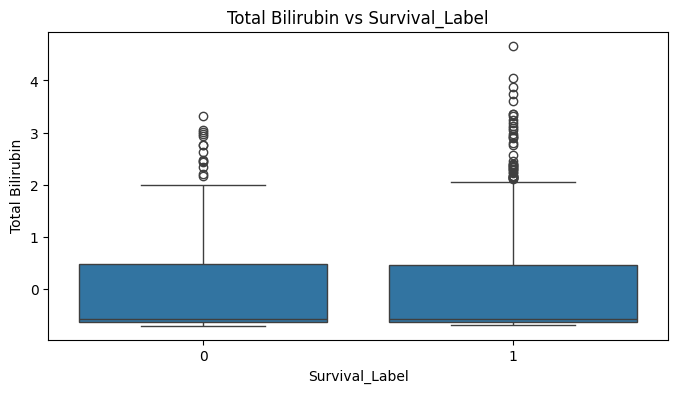

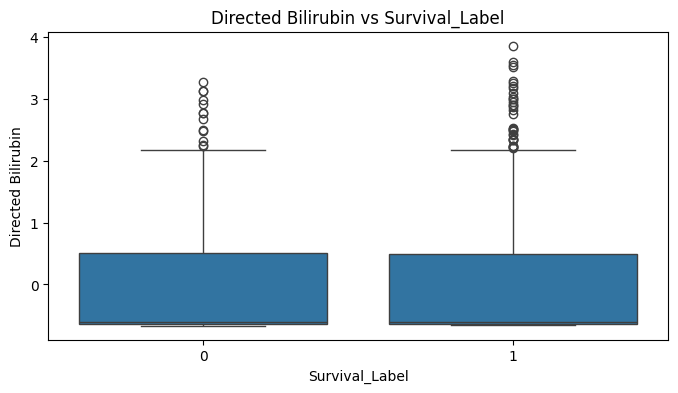


Correlation Analysis...


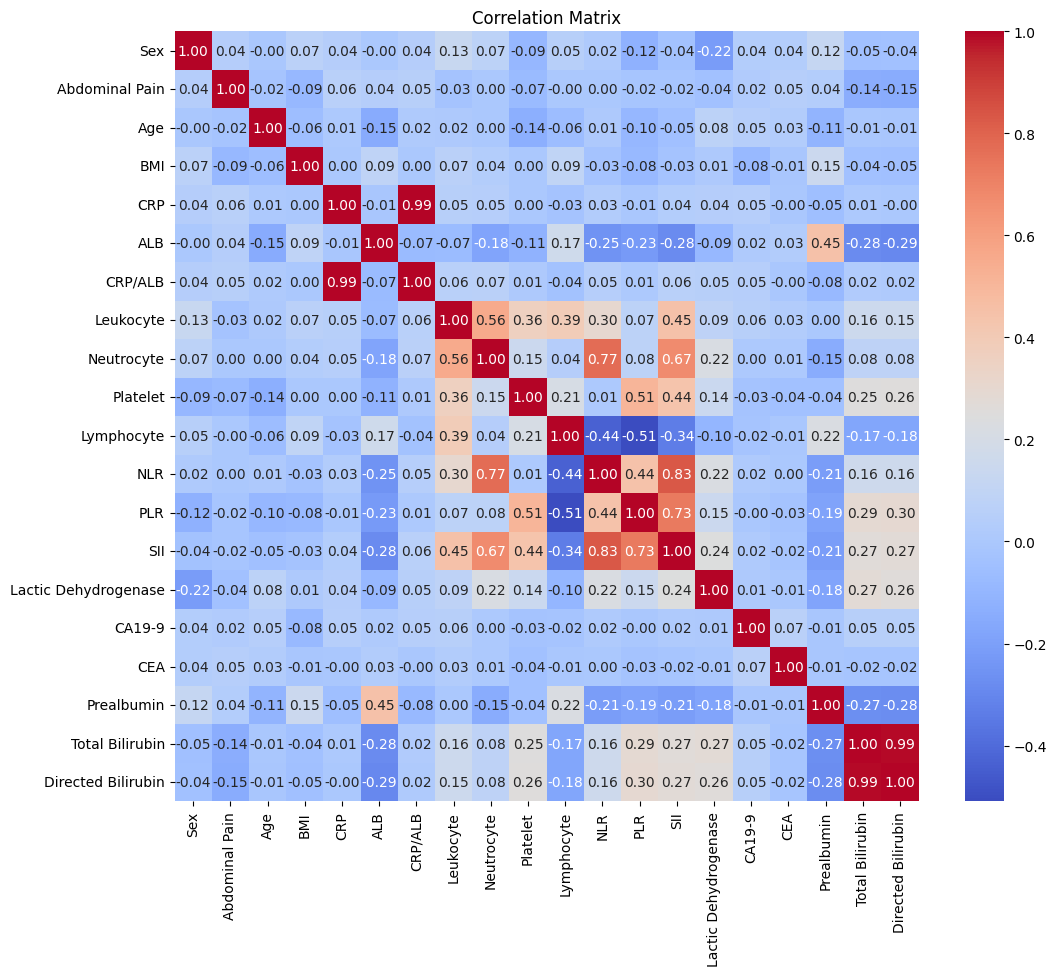


Analyzing Class Imbalance...
Survival_Label
1    604
0    274
Name: count, dtype: int64


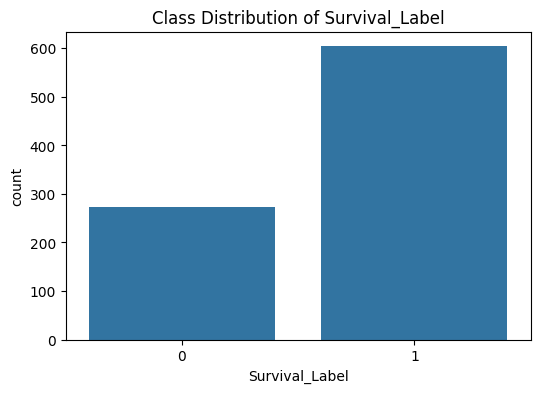


Feature-Target Analysis (Group Statistics)...
                     Sex  Abdominal Pain       Age       BMI       CRP  \
Survival_Label                                                           
0               0.023534        0.218658  0.084070 -0.037472  0.063800   
1              -0.010676       -0.099193 -0.038138  0.016999 -0.028942   

                     ALB   CRP/ALB  Leukocyte  Neutrocyte  Platelet  \
Survival_Label                                                        
0              -0.046393  0.061342   0.064007    0.123639  0.009389   
1               0.021046 -0.027827  -0.029036   -0.056088 -0.004259   

                Lymphocyte       NLR       PLR      SII  Lactic Dehydrogenase  \
Survival_Label                                                                  
0                -0.046648  0.091949  0.009184  0.09503             -0.067023   
1                 0.021161 -0.041712 -0.004166 -0.04311              0.030405   

                  CA19-9       CEA  Prealbumin

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Feature Distributions
print("\nVisualizing Feature Distributions...")
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop('Survival_Label')
df[numeric_columns].hist(figsize=(16, 12), bins=20)
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.show()

# Step 2: Analyze Relationships with the Target Variable
print("\nAnalyzing Relationships with the Target Variable...")

# Boxplots for numeric features vs. target variable
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Survival_Label', y=col)
    plt.title(f'{col} vs Survival_Label')
    plt.show()

# Bar plots for categorical features (if any) vs. target variable
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Survival_Label')
    plt.title(f'{col} vs Survival_Label')
    plt.show()

# Step 3: Correlation Analysis
print("\nCorrelation Analysis...")
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

# Step 4: Analyze Class Imbalance
print("\nAnalyzing Class Imbalance...")
print(df['Survival_Label'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='Survival_Label', data=df)
plt.title('Class Distribution of Survival_Label')
plt.show()

# Step 5: Feature-Target Analysis
print("\nFeature-Target Analysis (Group Statistics)...")
group_stats = df.groupby('Survival_Label').mean()
print(group_stats)


# features selection

Highly correlated features (correlation > 0.9):
{'Directed Bilirubin', 'CRP/ALB'}

Feature Importance (Top Features):
                 Feature  Importance
15                   CEA    0.087416
16            Prealbumin    0.075700
4                    CRP    0.068244
3                    BMI    0.066543
6              Leukocyte    0.065489
12                   SII    0.060196
17       Total Bilirubin    0.060048
13  Lactic Dehydrogenase    0.059408
7             Neutrocyte    0.059144
11                   PLR    0.059136
10                   NLR    0.057854
14                CA19-9    0.055373
9             Lymphocyte    0.053641
8               Platelet    0.053208
2                    Age    0.046131
5                    ALB    0.039281
1         Abdominal Pain    0.024346
0                    Sex    0.008842


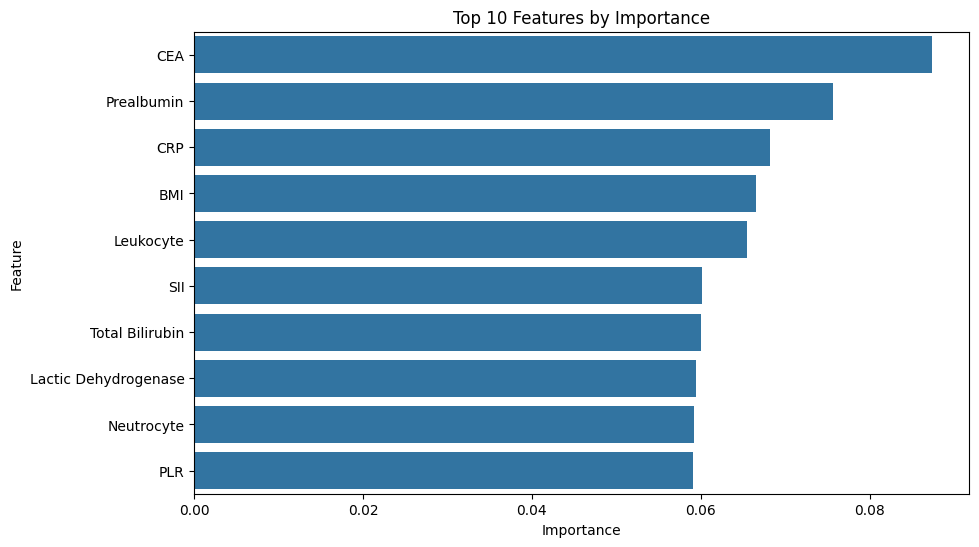


Selected Top Features: ['CEA' 'Prealbumin' 'CRP' 'BMI' 'Leukocyte' 'SII' 'Total Bilirubin'
 'Lactic Dehydrogenase' 'Neutrocyte' 'PLR']


In [5]:
# Step 1: Remove Multicollinear Features
# Set a correlation threshold (e.g., 0.9)
correlation_threshold = 0.9

# Compute correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Identify features with high correlation
high_correlation_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            high_correlation_features.add(colname)

print(f"Highly correlated features (correlation > {correlation_threshold}):")
print(high_correlation_features)

# Drop highly correlated features
df_reduced = df.drop(columns=high_correlation_features, errors='ignore')

# Step 2: Feature Importance using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split data into features and target
X = df_reduced.drop('Survival_Label', axis=1)
y = df_reduced['Survival_Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Compute feature importance
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Top Features):")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Features by Importance')
plt.show()

# Step 3: Select Top Features
# Based on feature importance, select top N features for modeling
top_features = feature_importances['Feature'].head(10).values
X_selected = X[top_features]

print(f"\nSelected Top Features: {top_features}")


# Data Splitting and Model Training


Training Logistic Regression...
Accuracy: 0.6856
ROC-AUC: 0.6228893058161351
              precision    recall  f1-score   support

           0       0.48      0.16      0.24        82
           1       0.71      0.92      0.80       182

    accuracy                           0.69       264
   macro avg       0.60      0.54      0.52       264
weighted avg       0.64      0.69      0.63       264


Training Support Vector Machine...
Accuracy: 0.6894
ROC-AUC: 0.5534709193245779
              precision    recall  f1-score   support

           0       0.50      0.02      0.05        82
           1       0.69      0.99      0.81       182

    accuracy                           0.69       264
   macro avg       0.60      0.51      0.43       264
weighted avg       0.63      0.69      0.58       264


Training Decision Tree...
Accuracy: 0.6250
ROC-AUC: 0.5705574912891986
              precision    recall  f1-score   support

           0       0.40      0.43      0.41        82
      

C:\Users\Vedha Pranava\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:54:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.6326
ROC-AUC: 0.5798043419994641
              precision    recall  f1-score   support

           0       0.34      0.20      0.25        82
           1       0.70      0.83      0.76       182

    accuracy                           0.63       264
   macro avg       0.52      0.51      0.50       264
weighted avg       0.59      0.63      0.60       264


Training AdaBoost...


C:\Users\Vedha Pranava\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.6932
ROC-AUC: 0.6057692307692307
              precision    recall  f1-score   support

           0       0.51      0.33      0.40        82
           1       0.74      0.86      0.79       182

    accuracy                           0.69       264
   macro avg       0.62      0.59      0.60       264
weighted avg       0.67      0.69      0.67       264


Training Extra Trees...
Accuracy: 0.6894
ROC-AUC: 0.5919659608683998
              precision    recall  f1-score   support

           0       0.50      0.18      0.27        82
           1       0.71      0.92      0.80       182

    accuracy                           0.69       264
   macro avg       0.61      0.55      0.54       264
weighted avg       0.65      0.69      0.64       264


Model Performance Comparison:
                    Model  Accuracy   ROC-AUC
0     Logistic Regression  0.685606  0.622889
1  Support Vector Machine  0.689394  0.553471
2           Decision Tree  0.625000  0.570557
3           Rand

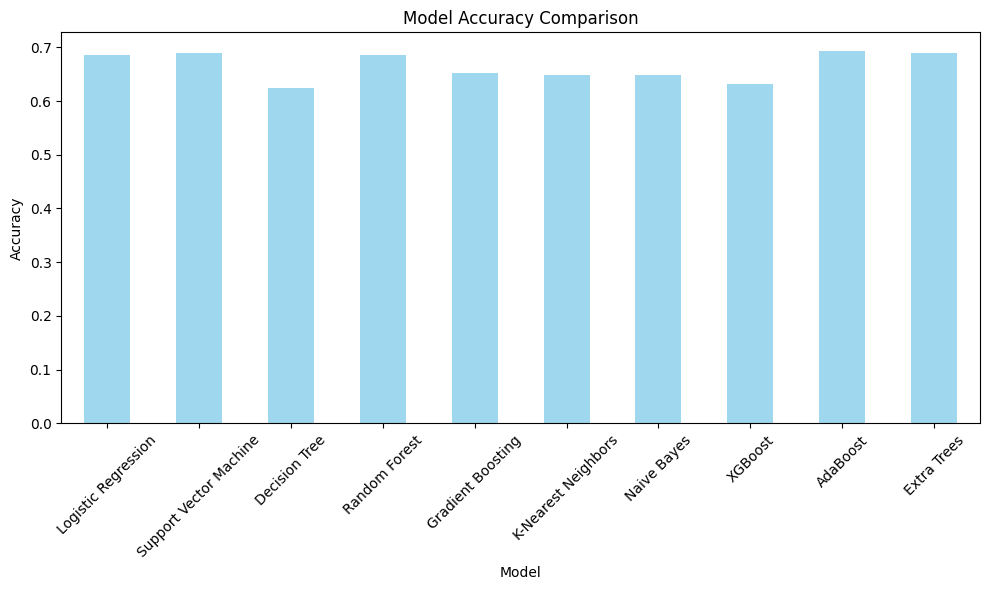

In [9]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = r"C:\Users\Vedha Pranava\Desktop\fds_pro\PCSPF-Pancreatic Cancer Survival based on Preoperative Features.xlsx"
df = pd.read_excel(file_path)

# Step 2: Prepare the features and target variable
target_column = 'label(Survive more than or equal to one year(1) / Survive less than one year(0))'
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target variable

# Step 3: Handle missing values (if any)
X.fillna(X.median(), inplace=True)  # Impute missing numeric values with median
y.fillna(y.mode()[0], inplace=True)  # Impute missing target values with mode

# Step 4: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Define the 10 classification models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42)
}

# Step 7: Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)  # Train the model
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc if roc_auc != 'N/A' else 'Not Applicable'}")
    print(classification_report(y_test, y_pred))
    
    # Store results for comparison
    results.append({'Model': name, 'Accuracy': accuracy, 'ROC-AUC': roc_auc})

# Step 8: Display the results as a DataFrame
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)

# Step 9: Visualize the results
plt.figure(figsize=(10, 6))
results_df.set_index('Model', inplace=True)
results_df['Accuracy'].plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [39]:
pip install -U scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Hyperparametertuning


Tuning SVM Hyperparameters...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best SVM Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

Tuned SVM Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       182
           1       0.73      0.64      0.68       181

    accuracy                           0.70       363
   macro avg       0.70      0.70      0.70       363
weighted avg       0.70      0.70      0.70       363

Tuned SVM Accuracy: 0.699724517906336
Tuned SVM ROC-AUC Score: 0.7500910691518426

Tuning Decision Tree Hyperparameters...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Decision Tree Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Tuned Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       182
           1       0.64      0.59      0.61   

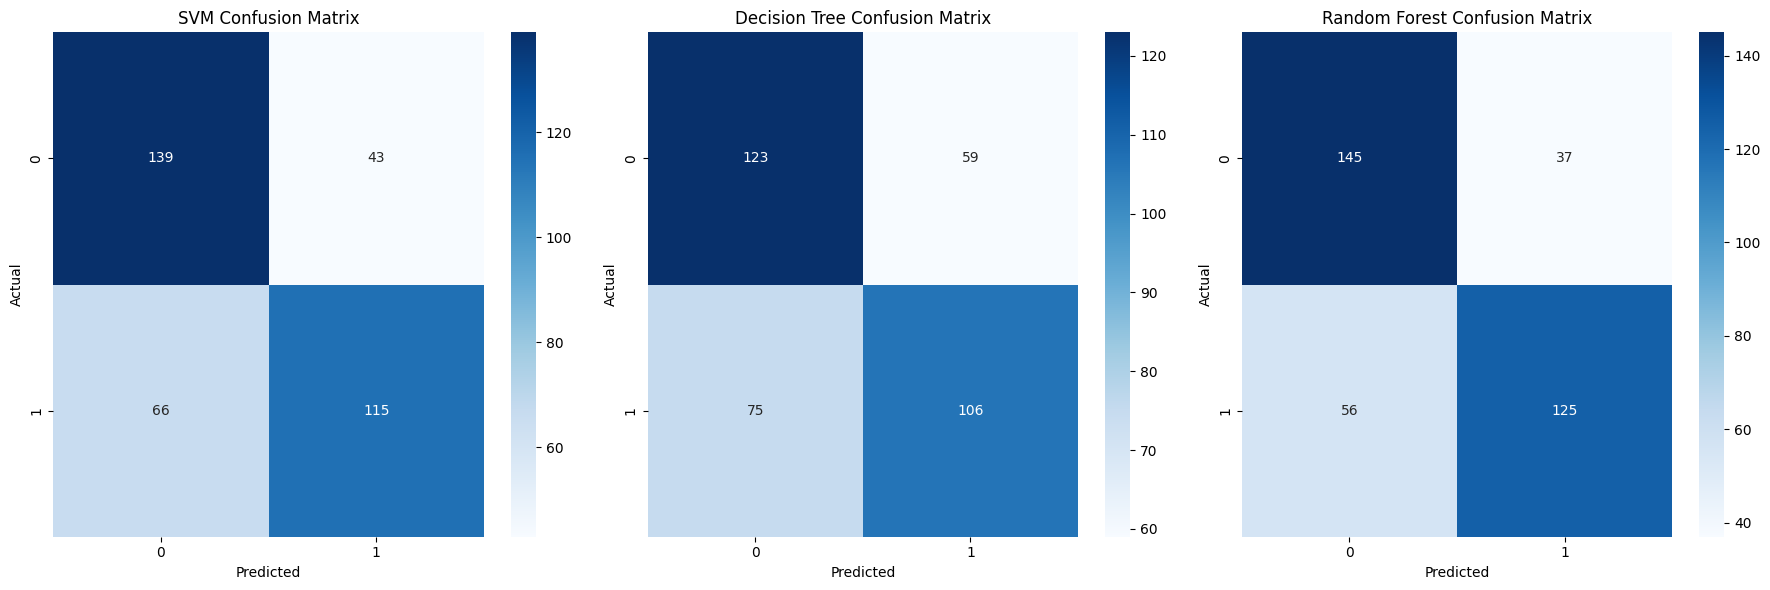

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Split and Balance the Data
X = df[['CEA', 'Prealbumin', 'CRP', 'BMI', 'Leukocyte', 'SII', 
        'Total Bilirubin', 'Lactic Dehydrogenase', 'Neutrocyte', 'PLR']]
y = df['Survival_Label']

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Step 2: Standardize the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function for Hyperparameter Tuning
def perform_grid_search(model, param_grid, X_train, y_train):
    search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=5,
        verbose=1,
        n_jobs=-1
    )
    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# Step 3: Hyperparameter Tuning for SVM
print("\nTuning SVM Hyperparameters...")
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
best_svm, best_svm_params = perform_grid_search(SVC(probability=True, random_state=42), svm_param_grid, X_train, y_train)
print("Best SVM Parameters:", best_svm_params)

# Evaluate SVM
svm_predictions = best_svm.predict(X_test)
svm_probabilities = best_svm.predict_proba(X_test)[:, 1]
print("\nTuned SVM Classification Report:")
print(classification_report(y_test, svm_predictions, zero_division=1))
print("Tuned SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("Tuned SVM ROC-AUC Score:", roc_auc_score(y_test, svm_probabilities))

# Step 4: Hyperparameter Tuning for Decision Tree
print("\nTuning Decision Tree Hyperparameters...")
tree_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
best_tree, best_tree_params = perform_grid_search(DecisionTreeClassifier(random_state=42), tree_param_grid, X_train, y_train)
print("Best Decision Tree Parameters:", best_tree_params)

# Evaluate Decision Tree
tree_predictions = best_tree.predict(X_test)
tree_probabilities = best_tree.predict_proba(X_test)[:, 1]
print("\nTuned Decision Tree Classification Report:")
print(classification_report(y_test, tree_predictions, zero_division=1))
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, tree_predictions))
print("Tuned Decision Tree ROC-AUC Score:", roc_auc_score(y_test, tree_probabilities))

# Step 5: Hyperparameter Tuning for Random Forest
print("\nTuning Random Forest Hyperparameters...")
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
best_rf, best_rf_params = perform_grid_search(RandomForestClassifier(random_state=42), rf_param_grid, X_train, y_train)
print("Best Random Forest Parameters:", best_rf_params)

# Evaluate Random Forest
rf_predictions = best_rf.predict(X_test)
rf_probabilities = best_rf.predict_proba(X_test)[:, 1]
print("\nTuned Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions, zero_division=1))
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Tuned Random Forest ROC-AUC Score:", roc_auc_score(y_test, rf_probabilities))

# Step 6: Confusion Matrices for All Models
print("\nConfusion Matrices:")
plt.figure(figsize=(18, 6))

# SVM Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Decision Tree Confusion Matrix
plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(y_test, tree_predictions), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Random Forest Confusion Matrix
plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


In [11]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import numpy as np

# Step 1: Define parameter grids for each model

# Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Optimization algorithm
    'penalty': ['l1', 'l2']  # Regularization terms
}

# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum number of samples for split
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples per leaf
}

# Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 10],  # Maximum depth
    'subsample': [0.8, 1.0]  # Fraction of samples for training each tree
}

# Support Vector Machine
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Step 2: Initialize models
models = {
    'Logistic Regression': (LogisticRegression(random_state=42, max_iter=1000), param_grid_lr),
    'Random Forest': (RandomForestClassifier(random_state=42), param_grid_rf),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), param_grid_gb),
    'SVM': (SVC(probability=True, random_state=42), param_grid_svm)
}

# Step 3: Perform GridSearchCV or RandomizedSearchCV for each model
best_models = {}
for model_name, (model, param_grid) in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    
    # Use RandomizedSearchCV for faster tuning or GridSearchCV for exhaustive search
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=20,  # Number of parameter combinations to try
        scoring='accuracy',
        cv=5,  # 5-fold cross-validation
        verbose=2,
        random_state=42,
        n_jobs=-1  # Use all available cores
    )
    
    # Fit the model
    search.fit(X_train, y_train)
    
    # Store the best model and its parameters
    best_models[model_name] = search.best_estimator_
    print(f"Best parameters for {model_name}: {search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {search.best_score_:.4f}")

# Step 4: Evaluate the tuned models on the test set
for model_name, best_model in best_models.items():
    print(f"\nEvaluating the tuned {model_name}...")
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None
    print(classification_report(y_test, y_pred))
    if y_prob is not None:
        print(f"{model_name} ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")


Tuning hyperparameters for Logistic Regression...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\Vedha Pranava\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Vedha Pranava\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vedha Pranava\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    est

Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
Best cross-validation accuracy for Logistic Regression: 0.6792
Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}
Best cross-validation accuracy for Random Forest: 0.6939
Tuning hyperparameters for Gradient Boosting...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Gradient Boosting: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01}
Best cross-validation accuracy for Gradient Boosting: 0.6889
Tuning hyperparameters for SVM...
Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\Vedha Pranava\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for SVM: {'kernel': 'poly', 'gamma': 'scale', 'C': 1}
Best cross-validation accuracy for SVM: 0.6987

Evaluating the tuned Logistic Regression...
              precision    recall  f1-score   support

           0       0.33      0.02      0.05        82
           1       0.69      0.98      0.81       182

    accuracy                           0.68       264
   macro avg       0.51      0.50      0.43       264
weighted avg       0.58      0.68      0.57       264

Logistic Regression ROC-AUC Score: 0.6324

Evaluating the tuned Random Forest...
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        82
           1       0.70      0.97      0.81       182

    accuracy                           0.69       264
   macro avg       0.60      0.52      0.46       264
weighted avg       0.64      0.69      0.59       264

Random Forest ROC-AUC Score: 0.5738

Evaluating the tuned Gradient Boosting...
              precision 

# smote

# Feature Importance Analysis:

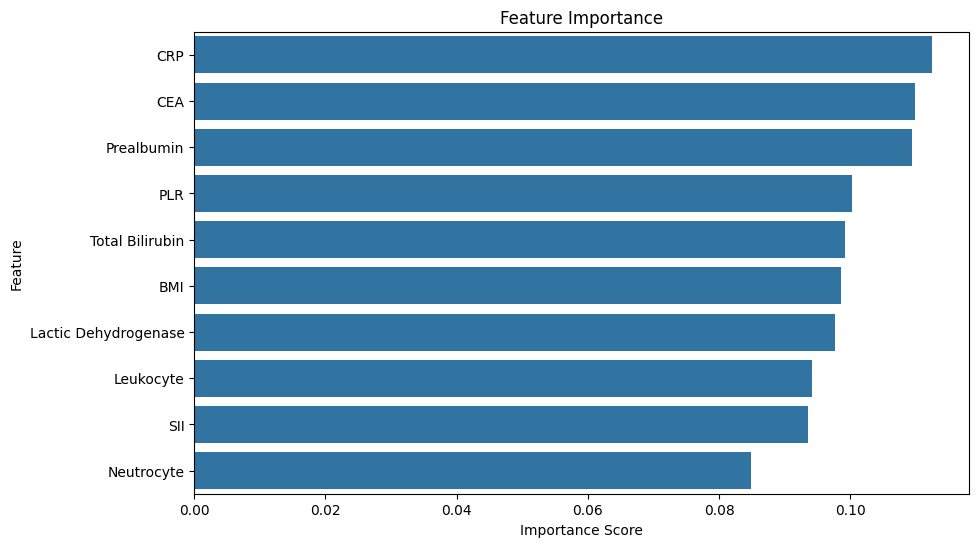

In [45]:
# Extract feature importance from the trained Random Forest
importances = best_rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


# Model Training,comparision and Evaluation After SMOTE¶


Training Logistic Regression...
Accuracy: 0.6818

Training Support Vector Machine...
Accuracy: 0.7008

Training Decision Tree...
Accuracy: 0.5758

Training Random Forest...
Accuracy: 0.6742

Training Gradient Boosting...
Accuracy: 0.6439

Training AdaBoost...


C:\Users\Vedha Pranava\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.6553

Training Extra Trees...
Accuracy: 0.7008

Training K-Nearest Neighbors...
Accuracy: 0.6250

Training Naive Bayes...
Accuracy: 0.6402

Training XGBoost...


C:\Users\Vedha Pranava\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:05:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.6629

Model Performance Comparison:
                    Model  Accuracy
0     Logistic Regression  0.681818
1  Support Vector Machine  0.700758
2           Decision Tree  0.575758
3           Random Forest  0.674242
4       Gradient Boosting  0.643939
5                AdaBoost  0.655303
6             Extra Trees  0.700758
7     K-Nearest Neighbors  0.625000
8             Naive Bayes  0.640152
9                 XGBoost  0.662879


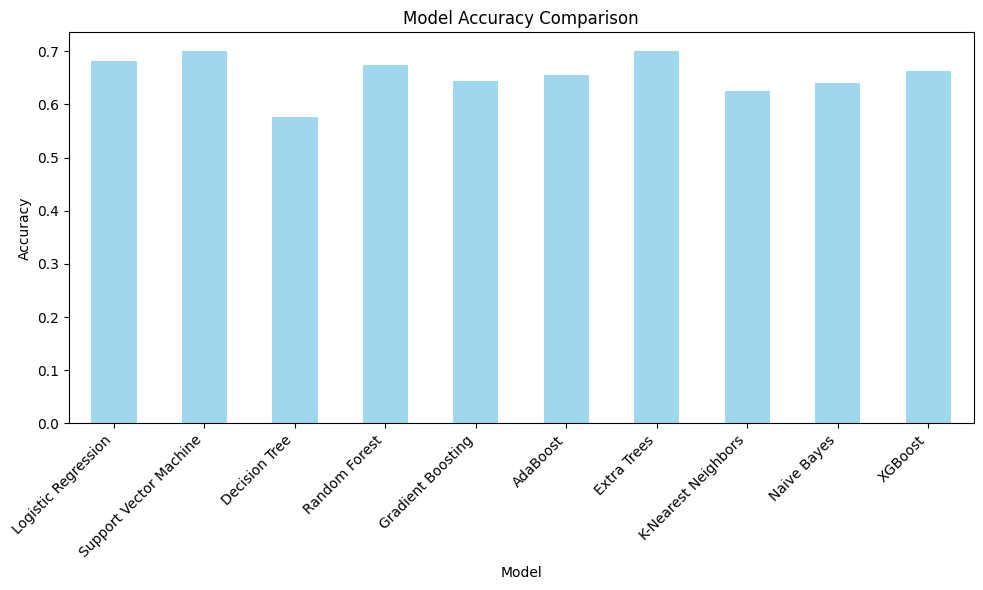

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Standardize the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Apply scaling to X_train
X_test = scaler.transform(X_test)       # Apply scaling to X_test

# Step 2: Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Oversample minority class to 50% of the majority class
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Step 4: Train models and collect accuracy
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predictions
    predictions = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Append results
    results.append({'Model': name, 'Accuracy': accuracy})

# Step 5: Create a DataFrame for comparison
results_df = pd.DataFrame(results)

# Step 6: Display the comparison table
print("\nModel Performance Comparison:")
print(results_df)

# Step 7: Visualize the accuracy
plt.figure(figsize=(10, 6))
results_df.set_index("Model")['Accuracy'].plot(kind='bar', alpha=0.8, color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [47]:
import joblib

# Save the best model
model_file = 'best_random_forest_model.pkl'
joblib.dump(best_rf, model_file)
print(f"Model saved to {model_file}")

# Load the model for predictions
loaded_model = joblib.load(model_file)
sample_prediction = loaded_model.predict(X_test[:5])
print("Sample Prediction:", sample_prediction)


Model saved to best_random_forest_model.pkl
Sample Prediction: [1 0 0 0 1]


Class distribution before SMOTE:
Survival_Label
1    604
0    274
Name: count, dtype: int64

Class distribution after SMOTE:
Survival_Label
1    604
0    604
Name: count, dtype: int64


C:\Users\Vedha Pranava\AppData\Local\Temp\ipykernel_5076\2785037564.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="muted")
C:\Users\Vedha Pranava\AppData\Local\Temp\ipykernel_5076\2785037564.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_smote, palette="pastel")


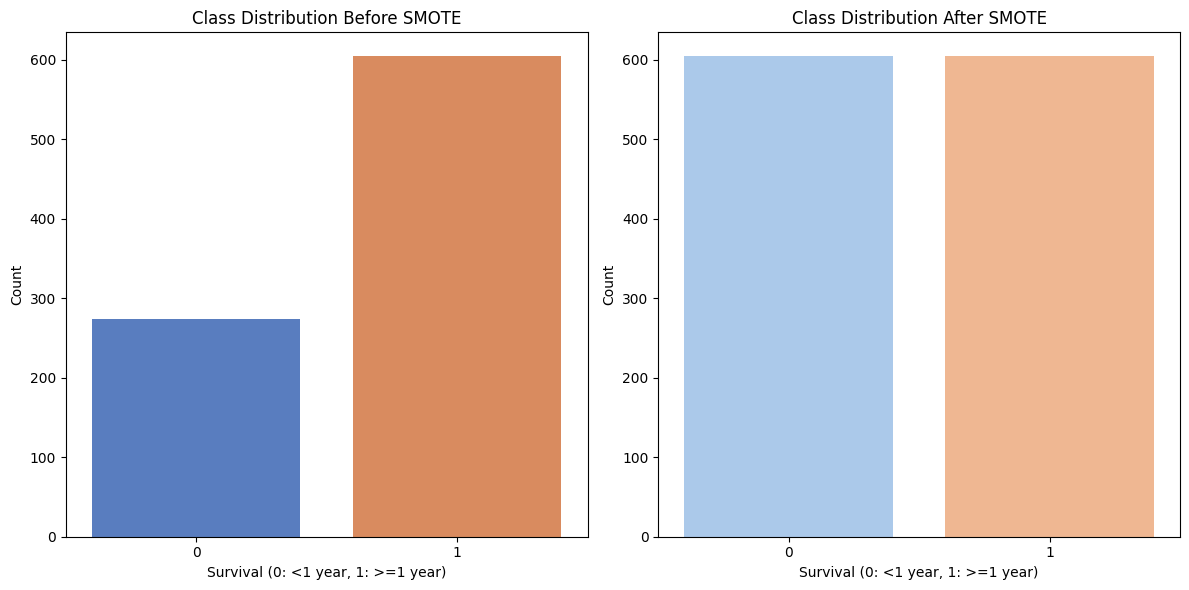

In [48]:
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Separate features and target variable
X = df.drop(columns=(['Survival_Label']))
y = df['Survival_Label']

# Step 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Step 3: Verify class distribution
print("Class distribution before SMOTE:")
print(y.value_counts())

print("\nClass distribution after SMOTE:")
print(pd.Series(y_smote).value_counts())

# Step 4: Visualize the class distribution
plt.figure(figsize=(12, 6))

# Before SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=y, palette="muted")
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Survival (0: <1 year, 1: >=1 year)")
plt.ylabel("Count")

# After SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_smote, palette="pastel")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Survival (0: <1 year, 1: >=1 year)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [23]:
print(df.columns)



Index(['Sex', 'Abdominal Pain', 'Age', 'BMI', 'CRP', 'ALB', 'CRP/ALB',
       'Leukocyte', 'Neutrocyte', 'Platelet', 'Lymphocyte', 'NLR', 'PLR',
       'SII', 'Lactic Dehydrogenase', 'CA19-9', 'CEA', 'Prealbumin',
       'Total Bilirubin', 'Directed Bilirubin', 'Survival_Label'],
      dtype='object')


# model accuracy comparision


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       121
           1       0.85      0.82      0.83       121

    accuracy                           0.83       242
   macro avg       0.84      0.83      0.83       242
weighted avg       0.84      0.83      0.83       242


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       121
           1       0.75      0.66      0.70       121

    accuracy                           0.72       242
   macro avg       0.73      0.72      0.72       242
weighted avg       0.73      0.72      0.72       242


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.67      0.64      0.66       121
           1       0.66      0.68      0.67       121

    accuracy                           0.66       242
   macro avg

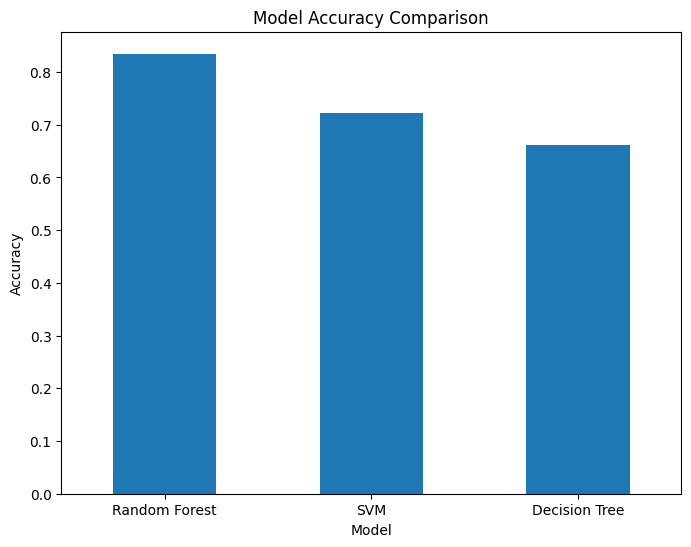

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Step 1: Split Balanced Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

# Step 2: Initialize Models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Step 3: Train Models and Calculate Accuracy
accuracy_results = []
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append({'Model': model_name, 'Accuracy': accuracy})
    
    # Display classification report for each model
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

# Step 4: Display Accuracy Results
accuracy_df = pd.DataFrame(accuracy_results)

print("\nAccuracy Comparison Across Models:")
print(accuracy_df)

# Visualize Accuracy Results
import matplotlib.pyplot as plt
accuracy_df.set_index('Model').plot(kind='bar', figsize=(8, 6), legend=False)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=0)
plt.show()


# Train Models and Calculate Accuracy


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       121
           1       0.85      0.82      0.83       121

    accuracy                           0.83       242
   macro avg       0.84      0.83      0.83       242
weighted avg       0.84      0.83      0.83       242


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       121
           1       0.75      0.66      0.70       121

    accuracy                           0.72       242
   macro avg       0.73      0.72      0.72       242
weighted avg       0.73      0.72      0.72       242


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.67      0.64      0.66       121
           1       0.66      0.68      0.67       121

    accuracy                           0.66       242
   macro avg

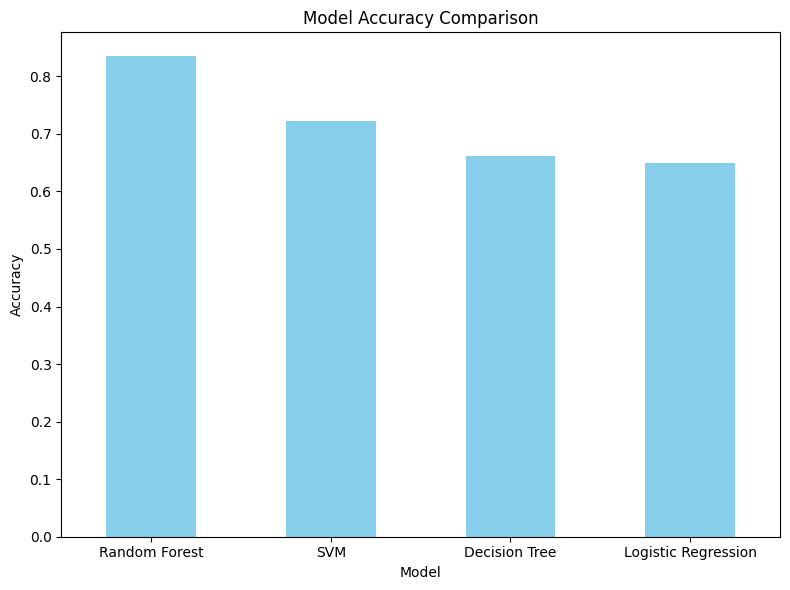

In [50]:
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       121
           1       0.85      0.82      0.83       121

    accuracy                           0.83       242
   macro avg       0.84      0.83      0.83       242
weighted avg       0.84      0.83      0.83       242


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       121
           1       0.75      0.66      0.70       121

    accuracy                           0.72       242
   macro avg       0.73      0.72      0.72       242
weighted avg       0.73      0.72      0.72       242


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.67      0.64      0.66       121
           1       0.66      0.68      0.67       121

    accuracy                           0.66       242
   macro avg       0.66      0.66      0.66       242
weighted avg       0.66      0.66      0.66       242


Accuracy Comparison Across Models:
           Model  Accuracy
0  Random Forest  0.834711
1            SVM  0.723140
2  Decision Tree  0.661157


#  hyperparameter

In [51]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],  # More trees
    'max_depth': [10, 20, 30, None],  # Control tree depth
    'min_samples_split': [2, 5, 10],  # Minimum split size
    'min_samples_leaf': [1, 2, 4]  # Minimum leaf size
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_tuned = best_rf.predict(X_test)
print("\nTuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_tuned))


Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\Vedha Pranava\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       121
           1       0.86      0.82      0.84       121

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242



In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 500],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method to select samples for training each tree
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    scoring='accuracy',  # Metric to optimize
    cv=5,  # 5-fold cross-validation
    verbose=2,  # Verbosity level for logging
    random_state=42,  # Seed for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and evaluation
print("\nBest Parameters Found:", random_search.best_params_)
best_rf = random_search.best_estimator_

# Evaluate the best model
y_pred = best_rf.predict(X_test)
print("\nRandomizedSearchCV Model Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters Found: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}

RandomizedSearchCV Model Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       121
           1       0.83      0.76      0.79       121

    accuracy                           0.80       242
   macro avg       0.80      0.80      0.80       242
weighted avg       0.80      0.80      0.80       242

Accuracy: 0.8016528925619835


# VotingClassifier

In [53]:
from sklearn.ensemble import VotingClassifier

# Initialize models
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
logreg = LogisticRegression(random_state=42)

# Voting classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('svm', svm),
    ('logreg', logreg)
], voting='soft')

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the ensemble model
print("\nVoting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting))



Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       121
           1       0.78      0.80      0.79       121

    accuracy                           0.79       242
   macro avg       0.79      0.79      0.79       242
weighted avg       0.79      0.79      0.79       242



# XGBClassifier

In [54]:
from xgboost import XGBClassifier

# Initialize and train XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Evaluate XGBoost
y_pred_xgb = xgb.predict(X_test)
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))



XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       121
           1       0.84      0.84      0.84       121

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242



C:\Users\Vedha Pranava\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:42:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# StackingClassifier

In [55]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

stack = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42))
    ],
    final_estimator=LogisticRegression()
)

stack.fit(X_train, y_train)
stack_pred = stack.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, stack_pred))


Stacking Classifier Accuracy: 0.8264462809917356


In [41]:
!pip install shap



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
pip install --upgrade shap matplotlib pandas scikit-learn


   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 1.9 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.5 MB 2.0 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/11.5 MB 2.4 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/11.5 MB 2.5 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/11.5 MB 2.7 MB/s eta 0:00:04
   ---------- ----------------------------- 3.1/11.5 MB 2.6 MB/s eta 0:00:04
   ----------- ---------------------------- 3.4/11.5 MB 2.1 MB/s eta 0:00:04
   ------------ --------------------------- 3.7/11.5 MB 2.1 MB/s eta 0:00:04
   ------------ --------------------------- 3.7/11.5 MB 2.1 MB/s eta 0:00:04
   ------------ --------------------------- 3.7/11.5 MB 2.1 MB/s eta 0:00:04
   ---------------- ----------------------- 4.7/11.5 MB 1.9 MB/s eta 0:00:04
   ----------

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
pip install --upgrade shap matplotlib pandas scikit-learn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
pip install lime



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  0%|          | 0/10 [00:00<?, ?it/s]

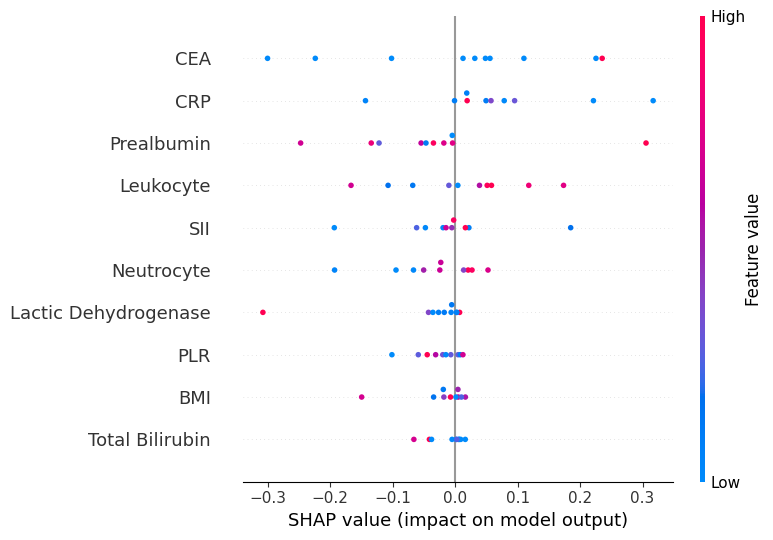

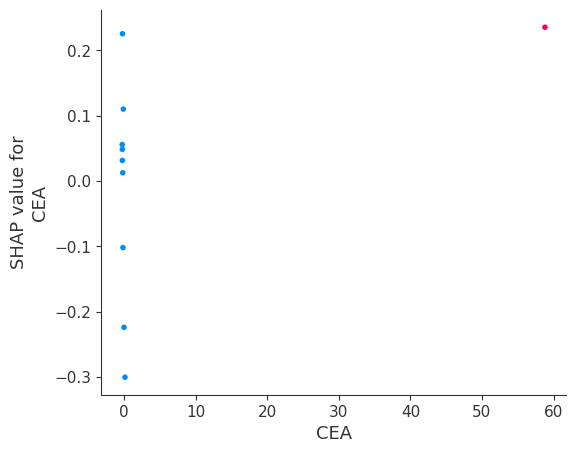

In [13]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Initialize SHAP KernelExplainer
# Use a small subset of training data to initialize the explainer
explainer = shap.KernelExplainer(model.predict, X_train[:100])

# Step 2: Calculate SHAP values for a subset of test data
shap_values = explainer.shap_values(X_test[:10])

# If SHAP values is a list, use the first element for binary classification
if isinstance(shap_values, list):
    shap_values = shap_values[0]

# Step 3: Generate SHAP Plots
# Summary Plot: Visualizes overall feature importance
shap.summary_plot(shap_values, X_test[:10], feature_names=X.columns)

# Dependence Plot: Shows how a specific feature affects predictions
shap.dependence_plot('CEA', shap_values, X_test[:10], feature_names=X.columns)


In [14]:
from lime.lime_tabular import LimeTabularExplainer

# Step 1: Define a wrapper function for LIME to predict probabilities
def model_predict_proba(data):
    # Ensure the model's predictions are formatted as probabilities
    predictions = model.predict(data).flatten()
    return np.array([1 - predictions, predictions]).T

# Step 2: Initialize the LIME Explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train,             # Training data for reference
    feature_names=X.columns,          # Feature names from the dataset
    class_names=['Non-Survival', 'Survival'],  # Class labels
    mode='classification'             # Mode for classification tasks
)

# Step 3: Explain a single instance from the test set
instance_idx = 0  # Change index to explain different instances
lime_explanation = lime_explainer.explain_instance(
    X_test[instance_idx], 
    model_predict_proba, 
    num_features=10  # Number of features to display in the explanation
)

# Step 4: Display the Explanation
lime_explanation.show_in_notebook(show_table=True, show_all=False)
